In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1 : Simulated data

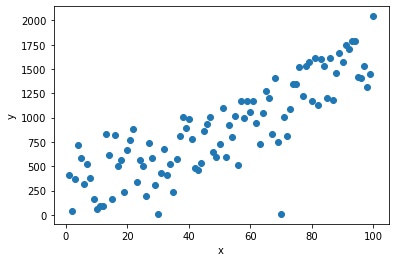

new point:  (30, 10.0)
new point:  (70, 10.0)


In [20]:
# Question 1
x = np.arange(1, 101)
epsilon = np.random.uniform(0, 800, size=(100,))
y = 0.1*x**2 + 3*x + 7 + epsilon
y[29] = 10
y[69] = 10
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('new point: ', (x[29], y[29]))
print('new point: ', (x[69], y[69]))


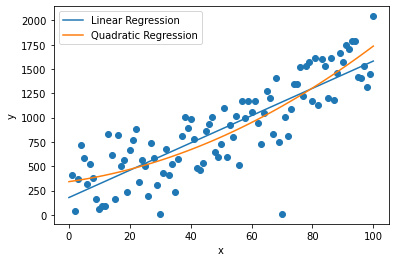

In [21]:
# Question 2
import sklearn.linear_model as lm
#linear regression (degree = 1)
model = np.poly1d(np.polyfit(x, y, 1))

#polynomial fit (degree = 2)
model2 = np.poly1d(np.polyfit(x, y, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, 100, 100)
plt.scatter(x, y)
plt.plot(polyline, model(polyline), label = 'Linear Regression')
plt.plot(polyline, model2(polyline), label = 'Quadratic Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [22]:
# Print R2 for linear regression
coefficients = np.polyfit(x, y, 1) 
linear_model = np.poly1d(coefficients)

# Predict values
y_pred = linear_model(x)

# Calculate R^2
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2 for linear regression: {r_squared}")

R^2 for linear regression: 0.7042616748059936


In [23]:
coefficients = np.polyfit(x, y, 2) 
quadratic_model = np.poly1d(coefficients)

y_pred = quadratic_model(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2 for quadratic regression: {r_squared}")

R^2 for quadratic regression: 0.7258443596018029


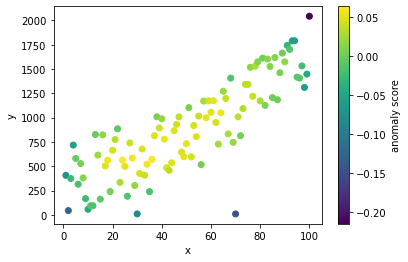

In [24]:
# Question 3 Isolation Forest 

from sklearn.ensemble import IsolationForest
df = pd.DataFrame({'x': x, 'y': y})
clf = IsolationForest(random_state=0).fit(df)

df['scores'] = clf.decision_function(df)

# Plot the anomaly score
plt.scatter(df['x'], df['y'], c=df['scores'], cmap='viridis')
plt.colorbar(label='anomaly score')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



Threshold: 0.05
Number of outliers 86
R^2 for linear regression: 0.7802
R^2 for quadratic regression: 0.8858


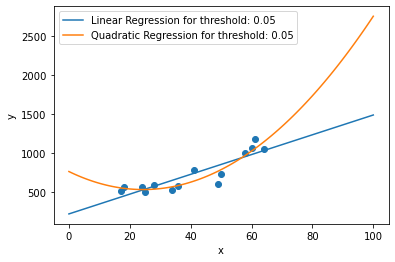

Threshold: 0.0395
Number of outliers 67
R^2 for linear regression: 0.5833
R^2 for quadratic regression: 0.671


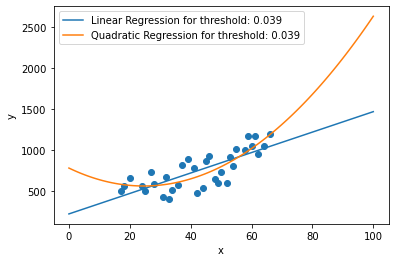

Threshold: 0.0289
Number of outliers 58
R^2 for linear regression: 0.6576
R^2 for quadratic regression: 0.6954


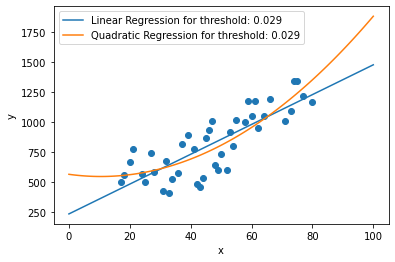

Threshold: 0.0184
Number of outliers 49
R^2 for linear regression: 0.6226
R^2 for quadratic regression: 0.6574


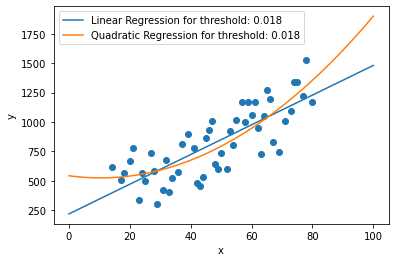

Threshold: 0.0079
Number of outliers 39
R^2 for linear regression: 0.6981
R^2 for quadratic regression: 0.7492


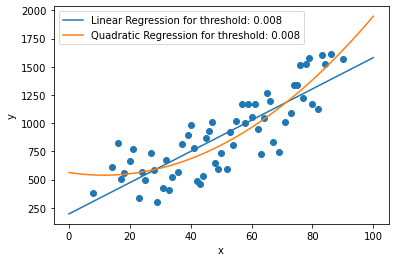

Threshold: -0.0026
Number of outliers 27
R^2 for linear regression: 0.6716
R^2 for quadratic regression: 0.7169


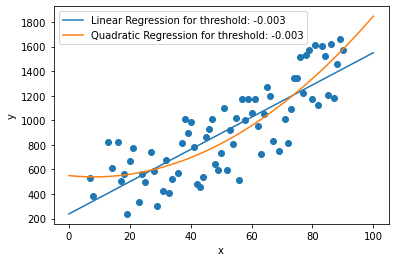

Threshold: -0.0132
Number of outliers 19
R^2 for linear regression: 0.7008
R^2 for quadratic regression: 0.7247


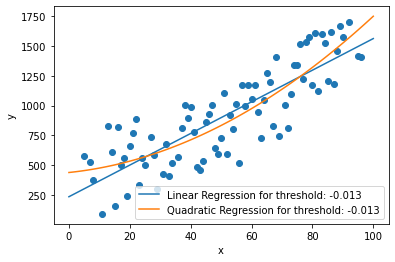

Threshold: -0.0237
Number of outliers 14
R^2 for linear regression: 0.7192
R^2 for quadratic regression: 0.7362


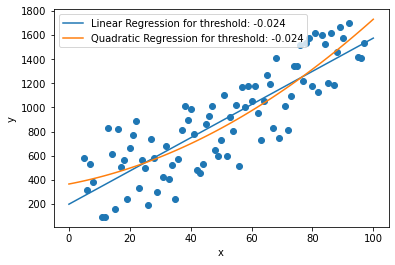

Threshold: -0.0342
Number of outliers 11
R^2 for linear regression: 0.7373
R^2 for quadratic regression: 0.7543


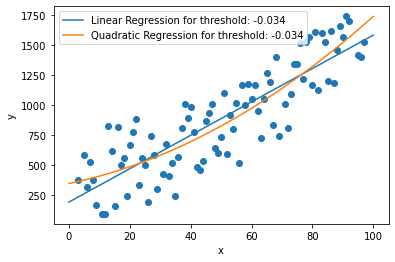

Threshold: -0.0447
Number of outliers 11
R^2 for linear regression: 0.7373
R^2 for quadratic regression: 0.7543


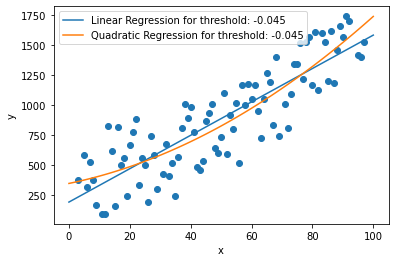

Threshold: -0.0553
Number of outliers 8
R^2 for linear regression: 0.7535
R^2 for quadratic regression: 0.7661


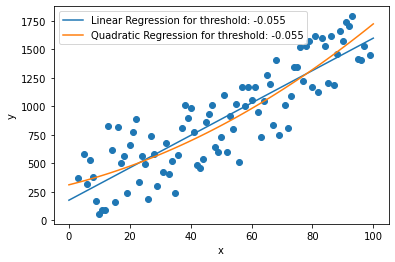

Threshold: -0.0658
Number of outliers 5
R^2 for linear regression: 0.7471
R^2 for quadratic regression: 0.7623


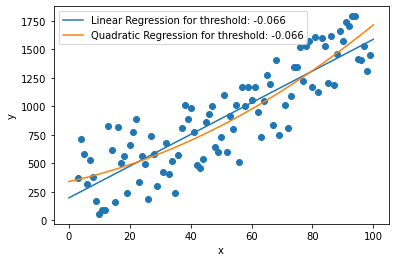

Threshold: -0.0763
Number of outliers 4
R^2 for linear regression: 0.7485
R^2 for quadratic regression: 0.7651


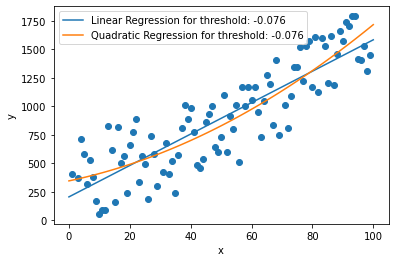

Threshold: -0.0868
Number of outliers 4
R^2 for linear regression: 0.7485
R^2 for quadratic regression: 0.7651


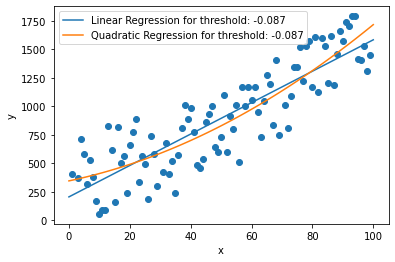

Threshold: -0.0974
Number of outliers 3
R^2 for linear regression: 0.7403
R^2 for quadratic regression: 0.7581


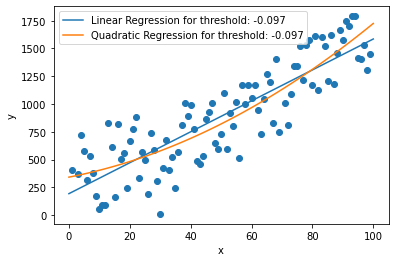

Threshold: -0.1079
Number of outliers 3
R^2 for linear regression: 0.7403
R^2 for quadratic regression: 0.7581


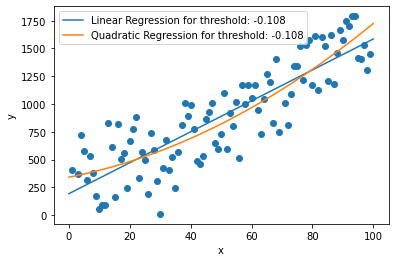

Threshold: -0.1184
Number of outliers 3
R^2 for linear regression: 0.7403
R^2 for quadratic regression: 0.7581


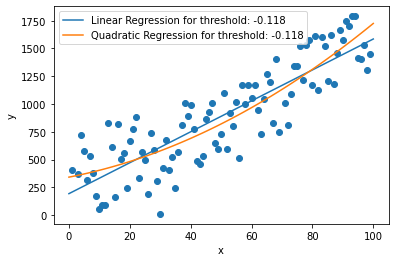

Threshold: -0.1289
Number of outliers 2
R^2 for linear regression: 0.7476
R^2 for quadratic regression: 0.7622


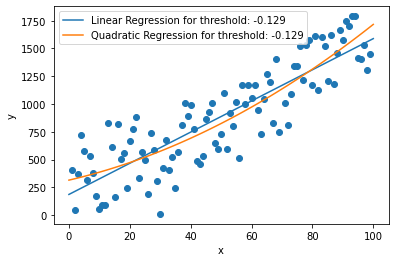

Threshold: -0.1395
Number of outliers 2
R^2 for linear regression: 0.7476
R^2 for quadratic regression: 0.7622


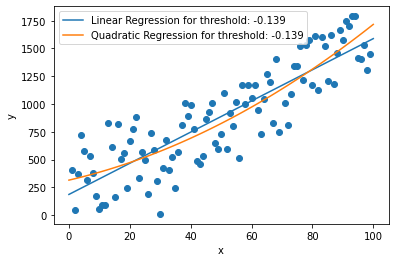

Threshold: -0.15
Number of outliers 1
R^2 for linear regression: 0.6962
R^2 for quadratic regression: 0.7137


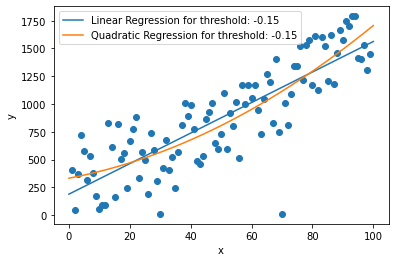

In [25]:
threshold = np.linspace(0.05, -0.15, 20)
for thesh in threshold:
    outliers = df[df['scores'] < thesh]
    print(f"Threshold: {np.round(thesh, 4)}")
    print('Number of outliers', len(outliers))

    new_df = df[df['scores'] >= thesh]
    # Reapply regression analysis
    new_x = new_df['x']
    new_y = new_df['y']

    new_model = np.poly1d(np.polyfit(new_x, new_y, 1)) # Linear regression
    new_model2 = np.poly1d(np.polyfit(new_x, new_y, 2)) # Quadratic regression

    # Compute R2 for both models

    coefficients = np.polyfit(new_x, new_y, 1) 
    linear_model = np.poly1d(coefficients)
    y_pred = linear_model(new_x)
    ss_res = np.sum((new_y - y_pred) ** 2)
    ss_tot = np.sum((new_y - np.mean(new_y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"R^2 for linear regression: {np.round(r_squared, 4)}")

    coefficients = np.polyfit(new_x, new_y, 2)
    quadratic_model = np.poly1d(coefficients)
    y_pred = quadratic_model(new_x)
    ss_res = np.sum((new_y - y_pred) ** 2)
    ss_tot = np.sum((new_y - np.mean(new_y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"R^2 for quadratic regression: {np.round(r_squared, 4)}")



    #add fitted polynomial line to scatterplot
    polyline = np.linspace(0, 100, 100)
    plt.scatter(new_x, new_y)
    plt.plot(polyline, new_model(polyline), label = 'Linear Regression for threshold: ' + str(np.round(thesh, 3)))
    plt.plot(polyline, new_model2(polyline), label = 'Quadratic Regression for threshold: ' + str(np.round(thesh, 3)))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # new_clf = IsolationForest(random_state=0).fit(new_df)
    # new_df['scores'] = new_clf.decision_function(new_df)

    # # Plot the anomaly score
    # plt.scatter(new_df['x'], new_df['y'], c=new_df['scores'], cmap='viridis')
    # plt.colorbar(label='anomaly score')
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.show()
    

In [12]:
%pip install pyemd

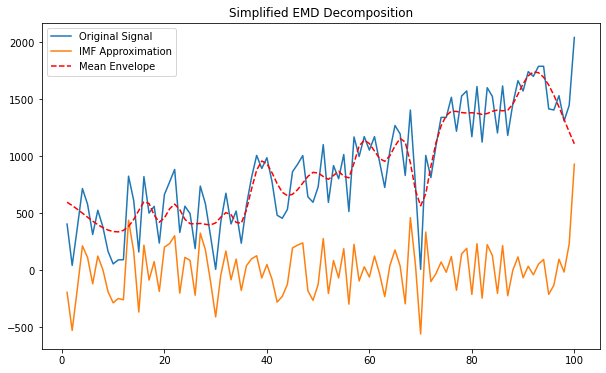

Original Data Regression:
Mean Squared Error: 68885.12308193815
R^2 Score: 0.7042616748059937
Slope: 14.030988906229123

Cleaned Data Regression:
Mean Squared Error: 48024.32522721739
R^2 Score: 0.023477292149473472
Slope: 1.1771337274194513


In [27]:
# Question 4 : Signal extraction and analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)

def simple_emd(x, y):
    # Find local maxima and minima
    from scipy.signal import argrelextrema
    maxima = argrelextrema(y, np.greater)[0]
    minima = argrelextrema(y, np.less)[0]

    # Interpolating envelopes
    env_max = CubicSpline(x[maxima], y[maxima])
    env_min = CubicSpline(x[minima], y[minima])

    # Mean envelope and IMF approximation
    mean_env = (env_max(x) + env_min(x)) / 2
    imf = y - mean_env

    return imf, mean_env

# Decompose one IMF
imf, mean_env = simple_emd(x, y)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Signal')
plt.plot(x, imf, label='IMF Approximation')
plt.plot(x, mean_env, 'r--', label='Mean Envelope')
plt.legend()
plt.title("Simplified EMD Decomposition")
plt.show()

# Linear regression on original and cleaned data
model_orig = LinearRegression().fit(x.reshape(-1, 1), y)
model_clean = LinearRegression().fit(x.reshape(-1, 1), imf)

# Predictions
y_pred_orig = model_orig.predict(x.reshape(-1, 1))
y_pred_clean = model_clean.predict(x.reshape(-1, 1))

# Metrics
mse_orig = mean_squared_error(y, y_pred_orig)
mse_clean = mean_squared_error(imf, y_pred_clean)
r2_orig = r2_score(y, y_pred_orig)
r2_clean = r2_score(imf, y_pred_clean)

print("Original Data Regression:")
print("Mean Squared Error:", mse_orig)
print("R^2 Score:", r2_orig)
print("Slope:", model_orig.coef_[0])

print("\nCleaned Data Regression:")
print("Mean Squared Error:", mse_clean)
print("R^2 Score:", r2_clean)
print("Slope:", model_clean.coef_[0])


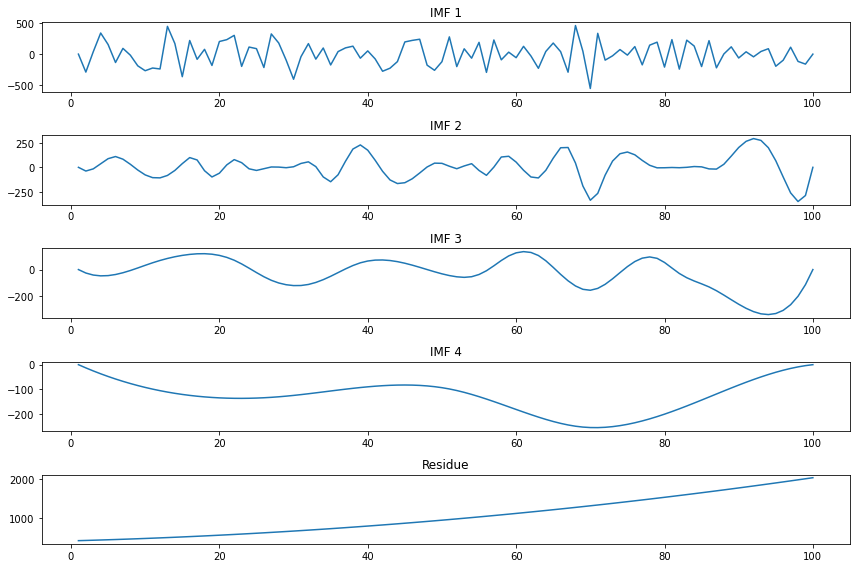

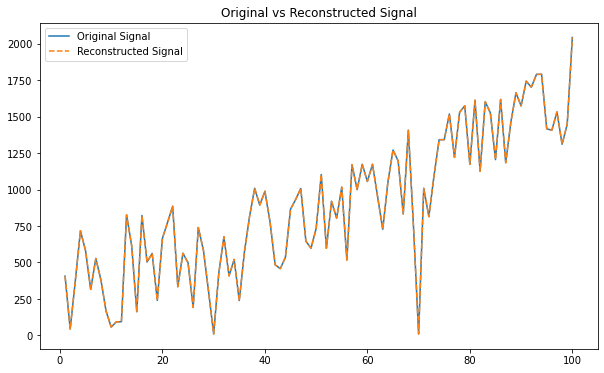

Mean Squared Error of Reconstruction: 8.582806648804609e-30


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import argrelextrema
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)

def extract_imf(x, y):
    """Extract a single IMF from the signal based on local extrema and mean envelopes."""
    maxima = argrelextrema(y, np.greater)[0]
    minima = argrelextrema(y, np.less)[0]
    
    # Ensure extrema include the endpoints for better spline fitting
    if maxima.size == 0 or maxima[0] != 0:
        maxima = np.insert(maxima, 0, 0)
    if maxima.size == 0 or maxima[-1] != len(y) - 1:
        maxima = np.append(maxima, len(y) - 1)
    if minima.size == 0 or minima[0] != 0:
        minima = np.insert(minima, 0, 0)
    if minima.size == 0 or minima[-1] != len(y) - 1:
        minima = np.append(minima, len(y) - 1)
        
    env_max = CubicSpline(x[maxima], y[maxima])
    env_min = CubicSpline(x[minima], y[minima])
    mean_env = (env_max(x) + env_min(x)) / 2
    imf = y - mean_env

    return imf, y - imf  # Return the IMF and the residue

def iterative_emd(x, y, max_imfs=10):
    imfs = []
    residue = y.copy()
    for i in range(max_imfs):
        imf, residue = extract_imf(x, residue)
        imfs.append(imf)
        if np.all(np.diff(residue) >= 0) or np.all(np.diff(residue) <= 0):  # Simple heuristic
            break
    return imfs, residue

# Decompose signal into IMFs
imfs, residue = iterative_emd(x, y)

# Plot IMFs and residue
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 1)
    plt.plot(x, imf)
    plt.title(f'IMF {i+1}')
plt.subplot(len(imfs) + 1, 1, len(imfs) + 1)
plt.plot(x, residue)
plt.title('Residue')
plt.tight_layout()
plt.show()

# Reconstruct the signal from IMFs
reconstructed_signal = np.sum(imfs, axis=0) + residue

# Plot original vs reconstructed
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Signal')
plt.plot(x, reconstructed_signal, '--', label='Reconstructed Signal')
plt.legend()
plt.title("Original vs Reconstructed Signal")
plt.show()

# Metrics to evaluate the reconstruction
mse_reconstruction = mean_squared_error(y, reconstructed_signal)
print(f"Mean Squared Error of Reconstruction: {mse_reconstruction}")


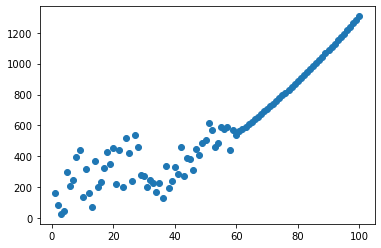

In [38]:
# Question 5 : Advanced noise generation and EMD

x = np.arange(1, 101)
epsilon1 = np.random.uniform(0, 400, size=(30,))
epsilon2 = np.random.normal(40, np.sqrt(5000), size=(30,))

y1 = 0.1*x[:30]**2 + 3*x[:30] + 7 + epsilon1
y2 = 0.1*x[30:60]**2 + 3*x[30:60] + 7 + epsilon2
y3 = 0.1*x[60:]**2 + 3*x[60:] + 7
y = np.concatenate([y1, y2, y3])

plt.scatter(x, y)

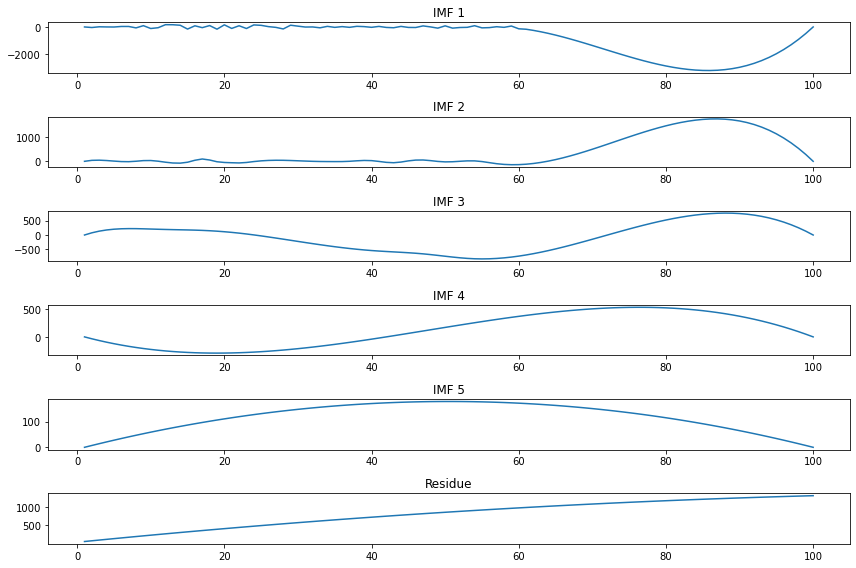

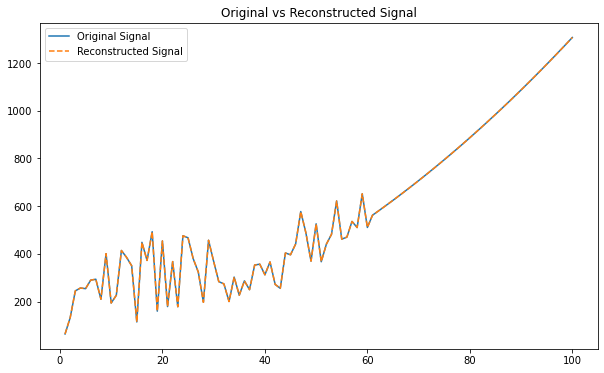

Mean Squared Error of Reconstruction: 2.0437177243741795e-27


In [37]:
imfs, residue = iterative_emd(x, y)

# Plot IMFs and residue
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 1)
    plt.plot(x, imf)
    plt.title(f'IMF {i+1}')
plt.subplot(len(imfs) + 1, 1, len(imfs) + 1)
plt.plot(x, residue)
plt.title('Residue')
plt.tight_layout()
plt.show()

# Reconstruct the signal from IMFs
reconstructed_signal = np.sum(imfs, axis=0) + residue

# Plot original vs reconstructed
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Signal')
plt.plot(x, reconstructed_signal, '--', label='Reconstructed Signal')
plt.legend()
plt.title("Original vs Reconstructed Signal")
plt.show()

# Metrics to evaluate the reconstruction
mse_reconstruction = mean_squared_error(y, reconstructed_signal)
print(f"Mean Squared Error of Reconstruction: {mse_reconstruction}")

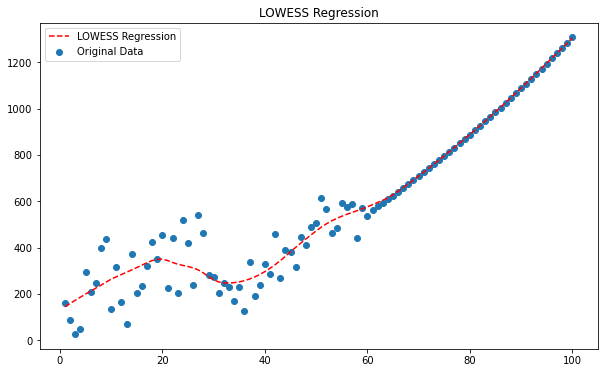

In [40]:
# Question 6: LOWESS regression
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generate synthetic data
np.random.seed(0)

# Apply LOWESS regression
lowess_smoothed = lowess(y, x, frac=0.2, return_sorted=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, lowess_smoothed, 'r--', label='LOWESS Regression')
plt.legend()
plt.title("LOWESS Regression")
plt.show()


## Part 2: Real-world data

In [42]:
# Question 1: Forecasting challenge
df0 = pd.read_csv('./Real-world_data/data_00.csv')
df1 = pd.read_csv('Real-world_data/data_01.csv')
df2 = pd.read_csv('Real-world_data/data_02.csv')
df3 = pd.read_csv('Real-world_data/data_03.csv')
df4 = pd.read_csv('Real-world_data/data_04.csv')
df5 = pd.read_csv('Real-world_data/data_05.csv')
df6 = pd.read_csv('Real-world_data/data_06.csv')
df7 = pd.read_csv('Real-world_data/data_07.csv')
df8 = pd.read_csv('Real-world_data/data_08.csv')
df9 = pd.read_csv('Real-world_data/data_09.csv')
df10 = pd.read_csv('Real-world_data/data_10.csv')
df11 = pd.read_csv('Real-world_data/data_11.csv')

df0.head()

FileNotFoundError: [Errno 2] File ./Real-world_data/data_00.csv does not exist: './Real-world_data/data_00.csv'